In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('train (1).csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [12]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [13]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of Houses')

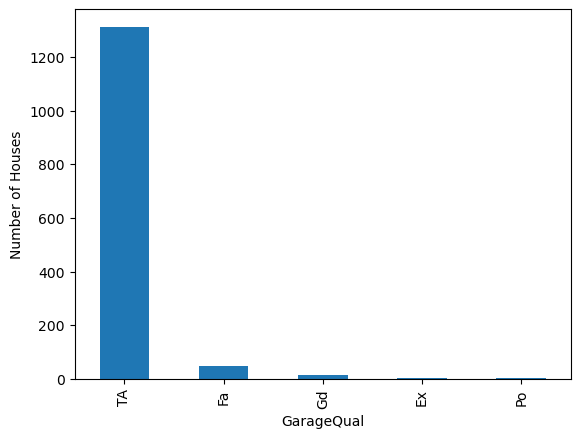

In [14]:
df['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

In [15]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

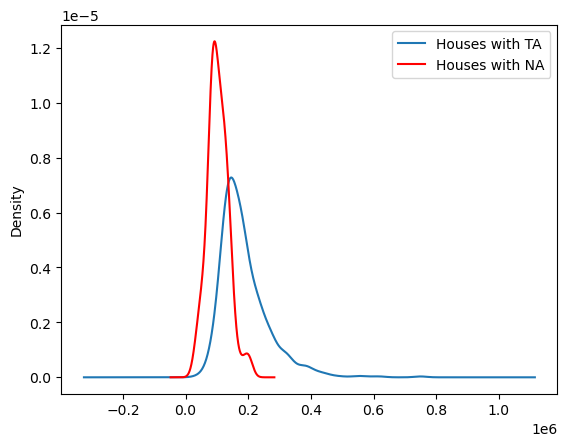

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax = ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc = 'best')

In [17]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [18]:
df['GarageQual'].fillna('TA', inplace=True)

<Axes: >

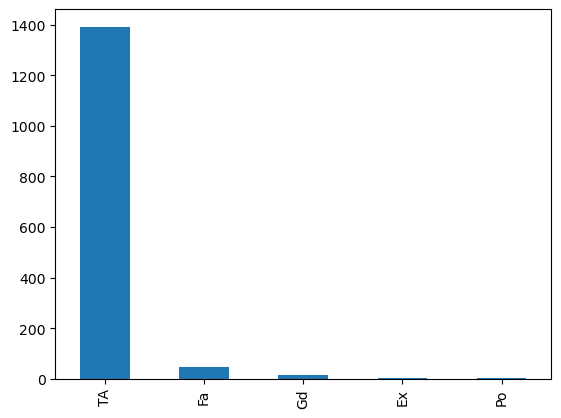

In [19]:
df['GarageQual'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'GarageQual')

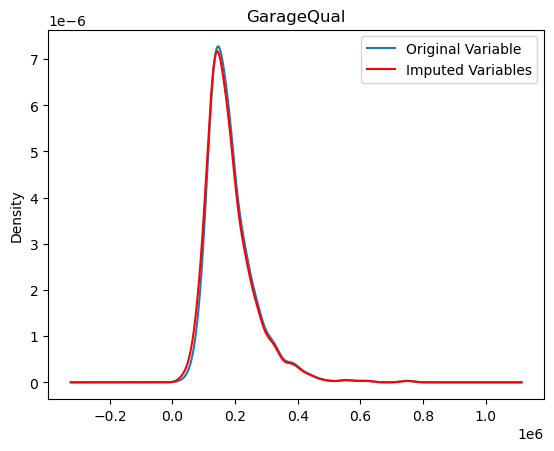

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'kde', ax = ax)

# distributions of the Variable after Imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax = ax, color = 'red')

lines, lables = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variables']
ax.legend(lines, labels, loc = 'best')

# add title
plt.title('GarageQual')

<Axes: >

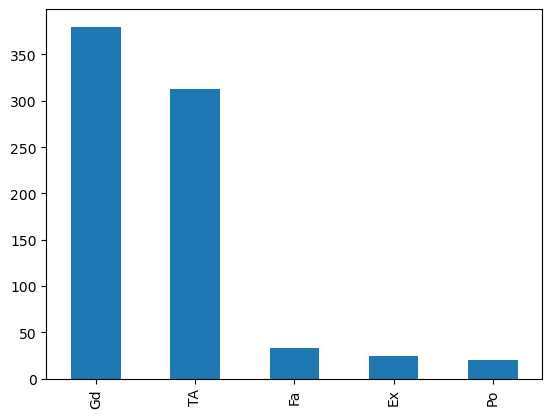

In [21]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

In [22]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

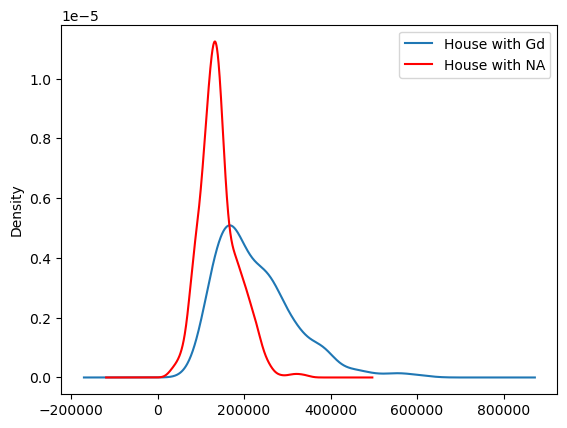

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', ax = ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['House with Gd', 'House with NA']
ax.legend(lines, labels, loc = 'best')

In [25]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [29]:
df['FireplaceQu'].fillna('Gd', inplace = True)

<Axes: >

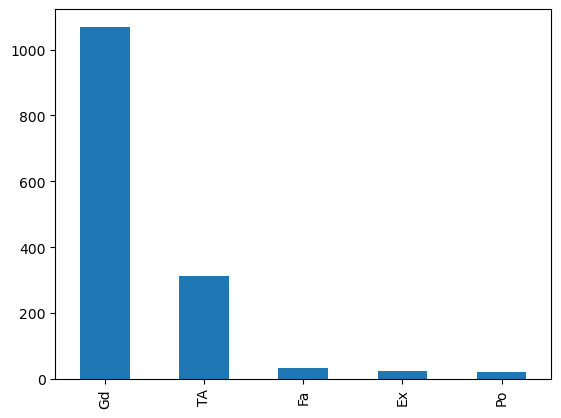

In [30]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'FirePlaceQu')

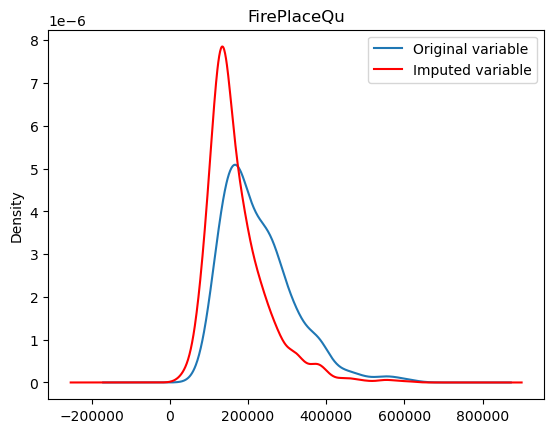

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'kde', ax = ax)

# distribution of the varaibles after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc = 'best')

# add title
plt.title('FirePlaceQu')

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2)

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy='most_frequent')

In [36]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [37]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)